In [122]:
#Importar librerias y CSV
import pandas as pd
df = pd.read_csv('/content/conjunto_de_datos_defunciones_registradas_2023.csv')
df.head()


,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,15,1,32,44,5,1,1,1,...,9,18,12,2022,NaN,88,888,8888,0,999
1,1,1,15,1,1,1,15,1,1,1,...,9,12,12,2022,NaN,88,888,8888,0,999
2,1,1,15,1,1,1,15,1,1,1,...,9,17,12,2022,NaN,88,888,8888,0,999
3,1,1,15,1,1,1,15,1,1,1,...,9,1,1,2023,NaN,88,888,8888,0,999
4,1,1,15,1,14,53,1,7777,1,1,...,8,22,12,2022,NaN,88,888,8888,0,999


# New Section

In [123]:
#Dejar unicamente los registros relacionados al suicidio
df = df[df['causa_def'].str.startswith(('X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69',
                                        'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79',
                                        'X80', 'X81', 'X82', 'X83', 'X84'))]


In [124]:
#Eliminar columnas no relevantes para nuestro caso
columnas_a_eliminar = ['ent_regis', 'mun_regis', 'tloc_regis', 'loc_regis', 'tloc_resid', 'loc_resid', 'tloc_ocurr', 'loc_ocurr', 'lista_mex', 'ent_nac', 'lengua', 'cve_lengua', 'nacionalid', 'nacesp_cve', 'sem_gest', 'gramos', 'dia_ocurr', 'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim', 'mes_nacim', 'anio_nacim', 'ocurr_trab', 'lugar_ocur', 'lugar_ocur', 'par_agre', 'vio_fami', 'asist_medi', 'cirugia', 'natviole', 'necropsia', 'usonecrops', 'encefalica', 'donador', 'cond_cert', 'embarazo', 'rel_emba', 'horas', 'minutos', 'area_ur', 'edad agru', 'complicaro', 'dia_cert', 'mes cert', 'anio_cert', 'maternas', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m', 'dis_re_oax', 'edad_agru', 'mes_cert', 'capitulo', 'grupo', 'lista1', 'gr_lismex']

df = df.drop(columns=columnas_a_eliminar, errors='ignore')
df.head()

,ent_resid,mun_resid,ent_ocurr,mun_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,sitio_ocur,derechohab
620,1,10,1,10,X709,T71X,1,2,2,4026,3,1,998,6,1,3,12,2
732,1,10,1,1,X709,T71X,2,2,2,4030,1,1,998,6,1,3,1,1
791,1,1,1,1,X700,T71X,1,2,2,4015,1,1,79,3,1,3,11,1
793,1,1,1,1,X700,T71X,2,2,2,4034,2,1,23,10,2,3,11,3
798,1,1,1,1,X700,T71X,1,2,2,4022,3,1,998,6,1,3,11,1


In [125]:
df['edad'] = df['edad'].astype(str)
df.loc[df['edad'] == '4998', 'edad'] = 'No especificado'
df['edad'] = df['edad'].str.lstrip('4')
df['edad'] = df['edad'].str.lstrip('0')
df.head()


,ent_resid,mun_resid,ent_ocurr,mun_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,mes_ocurr,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,sitio_ocur,derechohab
620,1,10,1,10,X709,T71X,1,2,2,26,3,1,998,6,1,3,12,2
732,1,10,1,1,X709,T71X,2,2,2,30,1,1,998,6,1,3,1,1
791,1,1,1,1,X700,T71X,1,2,2,15,1,1,79,3,1,3,11,1
793,1,1,1,1,X700,T71X,2,2,2,34,2,1,23,10,2,3,11,3
798,1,1,1,1,X700,T71X,1,2,2,22,3,1,998,6,1,3,11,1


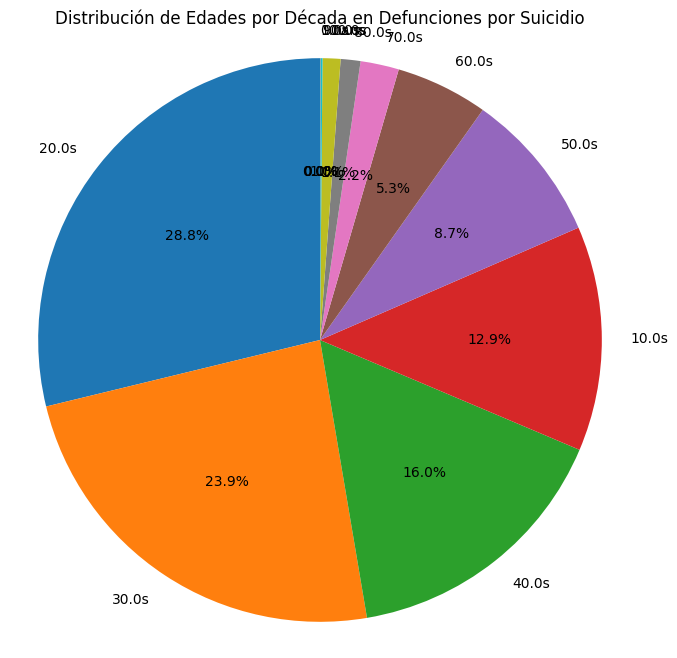

Porcentajes por década:


,count
Decada,
20.0s,28.791887
30.0s,23.875661
40.0s,15.961199
10.0s,12.896825
50.0s,8.675044
60.0s,5.291005
70.0s,2.204586
80.0s,1.135362
nans,1.025132


In [126]:
# prompt: Haz una grafica de pastel de las edades, agrupandolas por decadas pero mostrando los porcentajes en una lista aparte

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed as in the previous code

# Group ages by decades
df['edad'] = pd.to_numeric(df['edad'], errors='coerce') # Convert to numeric, handling errors
df['Decada'] = (df['edad'] // 10) * 10
df['Decada'] = df['Decada'].astype(str) + 's'
decades = df['Decada'].value_counts()

# Calculate percentages
percentages = (decades / decades.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(decades, labels=decades.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Edades por Década en Defunciones por Suicidio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print percentages in a separate list
print("Porcentajes por década:")
percentages


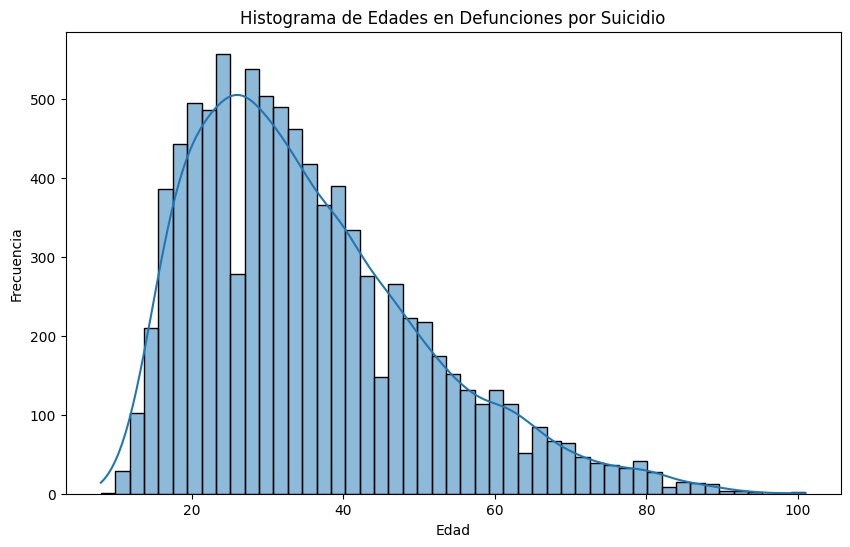

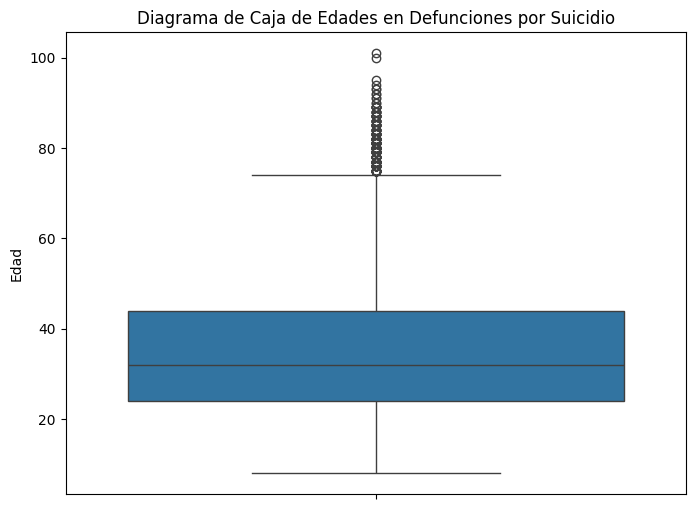

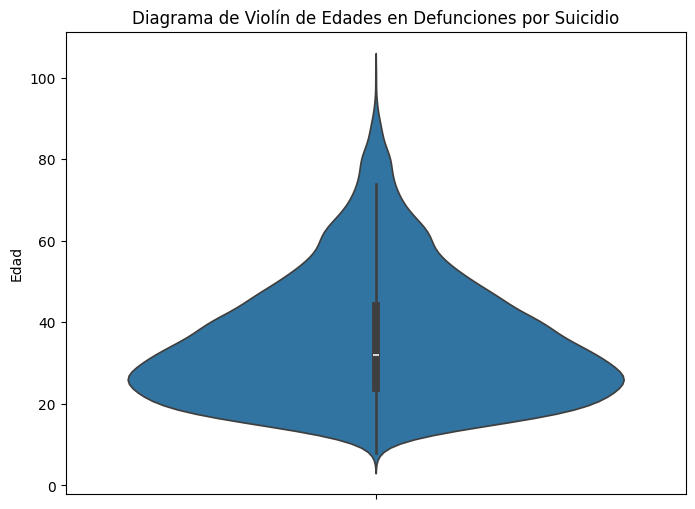

In [127]:
# prompt: Crear varios tipos de graficas de las edades

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], kde=True)
plt.title('Histograma de Edades en Defunciones por Suicidio')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['edad'])
plt.title('Diagrama de Caja de Edades en Defunciones por Suicidio')
plt.ylabel('Edad')
plt.show()


# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['edad'])
plt.title('Diagrama de Violín de Edades en Defunciones por Suicidio')
plt.ylabel('Edad')
plt.show()


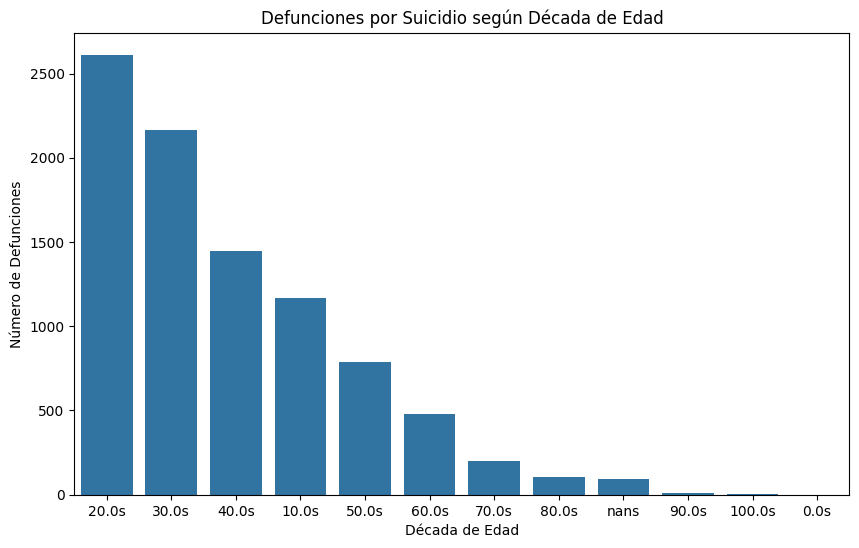

Porcentajes por década:


,count
Decada,
20.0s,28.791887
30.0s,23.875661
40.0s,15.961199
10.0s,12.896825
50.0s,8.675044
60.0s,5.291005
70.0s,2.204586
80.0s,1.135362
nans,1.025132


In [128]:
# prompt: Crear un diagrama de defunciones por suicidio segun edad

# Assuming df is already loaded and processed as in the previous code

# Group ages by decades
df['edad'] = pd.to_numeric(df['edad'], errors='coerce') # Convert to numeric, handling errors
df['Decada'] = (df['edad'] // 10) * 10
df['Decada'] = df['Decada'].astype(str) + 's'
decades = df['Decada'].value_counts()

# Calculate percentages
percentages = (decades / decades.sum()) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=decades.index, y=decades.values)
plt.title('Defunciones por Suicidio según Década de Edad')
plt.xlabel('Década de Edad')
plt.ylabel('Número de Defunciones')
plt.show()

# Print percentages in a separate list
print("Porcentajes por década:")
percentages


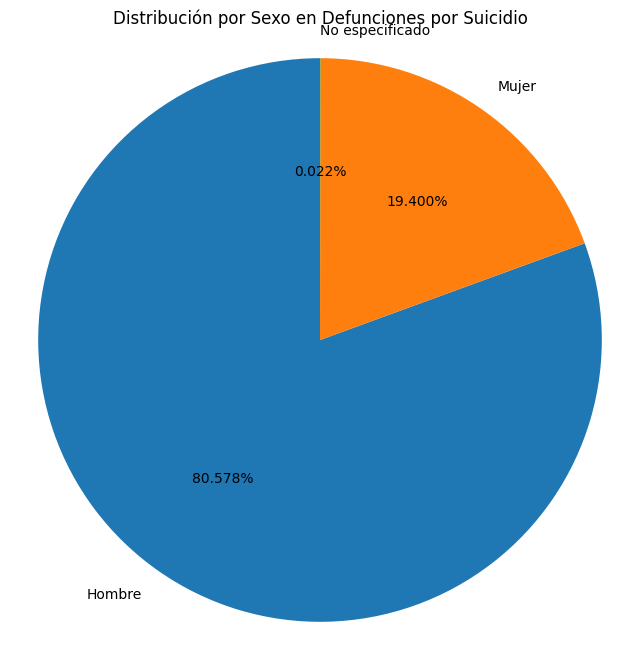

In [129]:
# prompt: Crear una grafica de pastel de la columna sexo, 1 es 'Hombre', 2 es 'Mujer' y 9 es 'No especificado'. Con el porcentaje con 3 digitos despues del punto

import matplotlib.pyplot as plt

# Assuming df is already loaded and processed as in the previous code
# Replace with your actual mapping if different
sexo_mapping = {1: 'Hombre', 2: 'Mujer', 9: 'No especificado'}

# Map the sexo codes to labels
df['sexo_label'] = df['sexo'].map(sexo_mapping)

# Count occurrences of each sex
sexo_counts = df['sexo_label'].value_counts()

# Calculate percentages with 3 decimal places
percentages = (sexo_counts / sexo_counts.sum()) * 100
percentages = percentages.round(3)


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct=lambda p: f'{p:.3f}%', startangle=90)
plt.title('Distribución por Sexo en Defunciones por Suicidio')
plt.axis('equal')
plt.show()


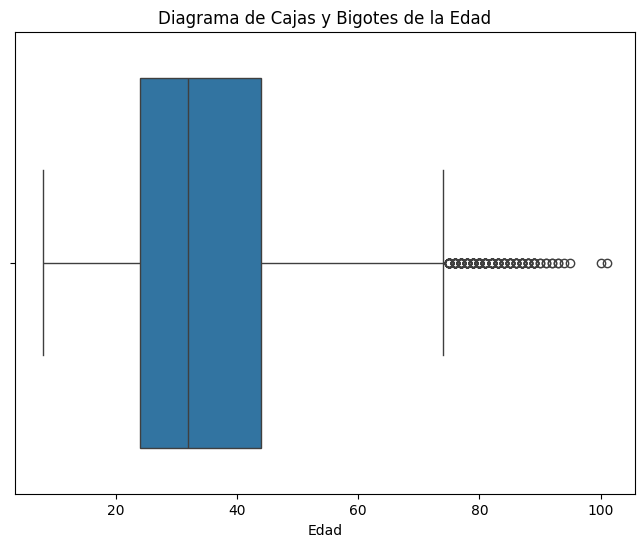

In [130]:
# prompt: Haz un diagrama de cajas y bigotes de la edad

import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['edad'])
plt.title('Diagrama de Cajas y Bigotes de la Edad')
plt.xlabel('Edad')
plt.show()


In [131]:
entidad_catalog = pd.read_csv('/content/catalogos/entidad.csv')
df = pd.merge(df, entidad_catalog, left_on='ent_resid', right_on='codigo', how='left', suffixes=('', '_xd'))
df = pd.merge(df, entidad_catalog, left_on='ent_ocurr', right_on='codigo', how='left', suffixes=('', '_ocurr'))
columnas_a_eliminar = ['Decada', 'codigo', 'codigo_ocurr']
df = df.drop(columns=columnas_a_eliminar, errors='ignore')
df.head()
df.head()


,ent_resid,mun_resid,ent_ocurr,mun_ocurr,causa_def,cod_adicio,sexo,afromex,conindig,edad,...,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,sitio_ocur,derechohab,sexo_label,entidad,entidad_ocurr
0,1,10,1,10,X709,T71X,1,2,2,26.0,...,1,998,6,1,3,12,2,Hombre,Aguascalientes,Aguascalientes
1,1,10,1,1,X709,T71X,2,2,2,30.0,...,1,998,6,1,3,1,1,Mujer,Aguascalientes,Aguascalientes
2,1,1,1,1,X700,T71X,1,2,2,15.0,...,1,79,3,1,3,11,1,Hombre,Aguascalientes,Aguascalientes
3,1,1,1,1,X700,T71X,2,2,2,34.0,...,1,23,10,2,3,11,3,Mujer,Aguascalientes,Aguascalientes
4,1,1,1,1,X700,T71X,1,2,2,22.0,...,1,998,6,1,3,11,1,Hombre,Aguascalientes,Aguascalientes


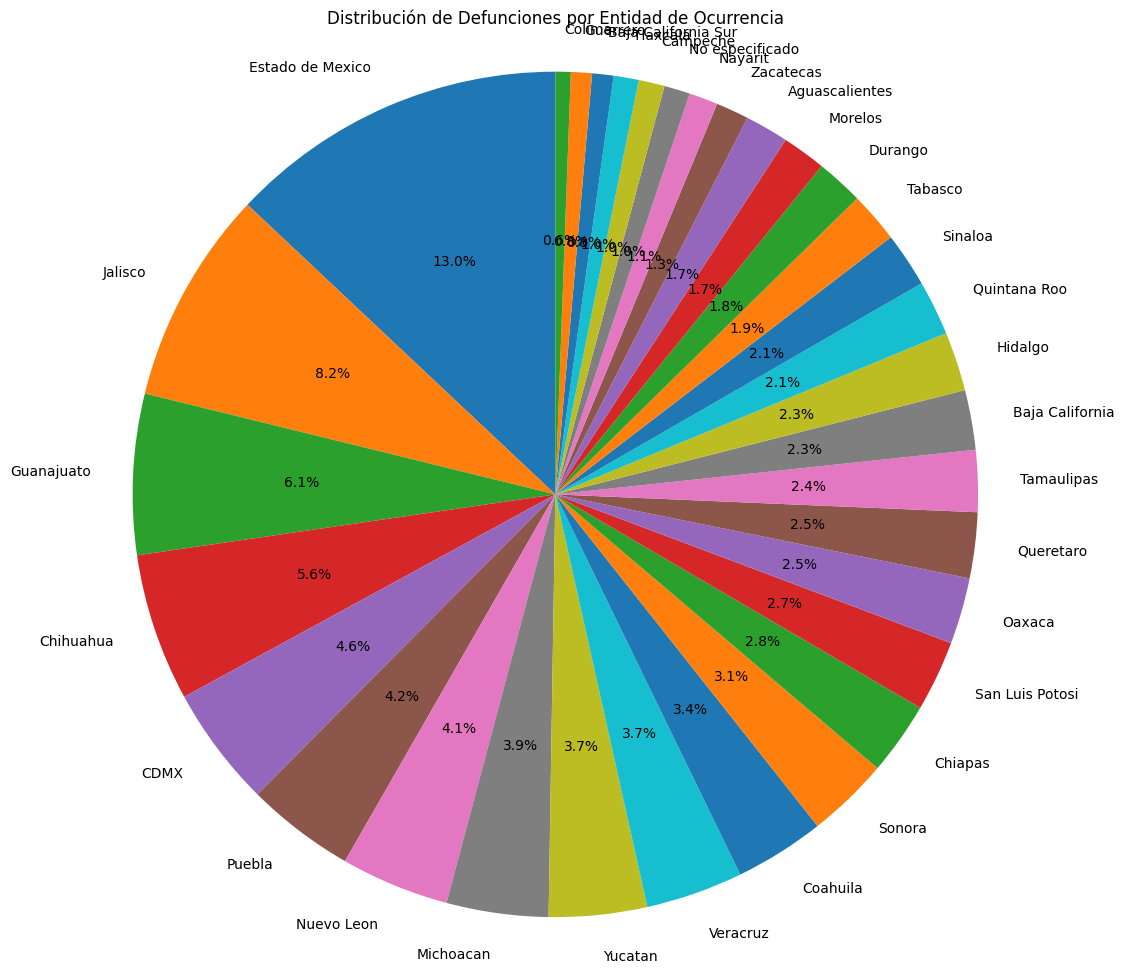

,count
entidad_ocurr,
Estado de Mexico,1178
Jalisco,742
Guanajuato,557
Chihuahua,512
CDMX,418
Puebla,377
Nuevo Leon,376
Michoacan,353
Yucatan,340


In [135]:
# prompt: Hacer una grafica de pastel de la columna entidad_ocurr y hacer una tabla

# Assuming df is already loaded and processed as in the previous code

# Create the pie chart for entidad_ocurr
entidad_ocurr_counts = df['entidad_ocurr'].value_counts()
plt.figure(figsize=(12, 12))  # Adjust figure size for better visualization
plt.pie(entidad_ocurr_counts, labels=entidad_ocurr_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Defunciones por Entidad de Ocurrencia')
plt.axis('equal')
plt.show()

# Display the table of entidad_ocurr counts
entidad_ocurr_counts


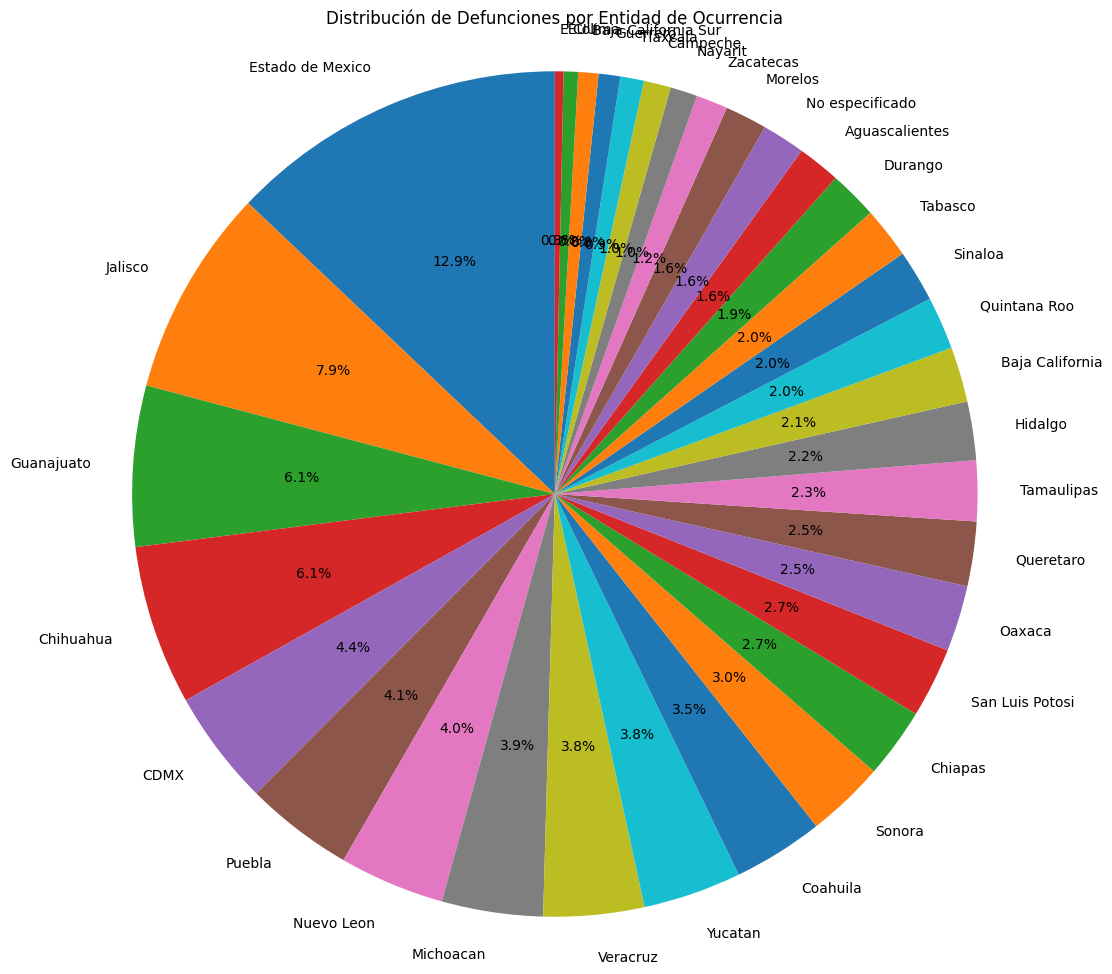

In [133]:
# prompt: Hacer una grafica de pastel de la columna entidad_ocurr

# Assuming df is already loaded and processed as in the previous code
import matplotlib.pyplot as plt

# Count occurrences of each entity
entidad_ocurr_counts = df['entidad'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(entidad_ocurr_counts, labels=entidad_ocurr_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Defunciones por Entidad de Ocurrencia')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [136]:
# prompt: Me podrías dar la media, mediana, moda, rango medio, cuartiles, rango intercuartilico y limites de la columna de edad

# Assuming df and the 'edad' column are already processed as in your previous code.

import pandas as pd

# Calculate descriptive statistics for the 'edad' column
edad_stats = df['edad'].describe()
print("Descriptive Statistics for Edad:\n", edad_stats)

# Calculate the median
median_age = df['edad'].median()
print("\nMedian Age:", median_age)

# Calculate the mode
mode_age = df['edad'].mode()
print("\nMode Age:", mode_age)

# Calculate the mid-range
mid_range = (df['edad'].max() + df['edad'].min()) / 2
print("\nMid-range:", mid_range)


# Calculate quartiles
q1 = df['edad'].quantile(0.25)
q3 = df['edad'].quantile(0.75)
print("\nFirst Quartile (Q1):", q1)
print("Third Quartile (Q3):", q3)

# Calculate interquartile range
iqr = q3 - q1
print("\nInterquartile Range (IQR):", iqr)


# Calculate lower and upper limits (outlier detection using IQR)
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print("\nLower Limit:", lower_limit)
print("Upper Limit:", upper_limit)



Descriptive Statistics for Edad:
 count    8979.000000
mean       35.494042
std        15.403594
min         8.000000
25%        24.000000
50%        32.000000
75%        44.000000
max       101.000000
Name: edad, dtype: float64

Median Age: 32.0

Mode Age: 0    24.0
Name: edad, dtype: float64

Mid-range: 54.5

First Quartile (Q1): 24.0
Third Quartile (Q3): 44.0

Interquartile Range (IQR): 20.0

Lower Limit: -6.0
Upper Limit: 74.0


In [134]:
#Exportar el dataframe
df.to_csv('suicidios.csv', index=False)
